In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics
#import relevant resources including sklearn seaborn numpy pandas for machine learning progress
#import matplotlib for ploting results

Question a

In [38]:
data = pd.read_csv("week2.csv")
data.reset_index(inplace=True)          #reset the index of DataFrame to make it a column for the numeric index provided by pandas 
data.columns = ['X1', 'X2', 'y']        #define column header
data.head()                             #generate results

,X1,X2,y
0,0.53,-0.01,-1
1,-0.61,0.81,-1
2,-0.51,0.62,1
3,-0.14,0.28,1
4,-0.52,-0.21,-1


In [39]:
df = data.copy()                        #copy a new data parameter from data to df
df.head()                               #generate results again

,X1,X2,y
0,0.53,-0.01,-1
1,-0.61,0.81,-1
2,-0.51,0.62,1
3,-0.14,0.28,1
4,-0.52,-0.21,-1


In [40]:
X1 = df.iloc[:, 0]                     #integer based index 0
X2 = df.iloc[:, 1]                     #integer based index 1
X = np.column_stack((X1, X2))          #combine into a a stack
y = df.iloc[:, 2]                      #integer based index 2
#define integer location in DataFrame

Question a(i)

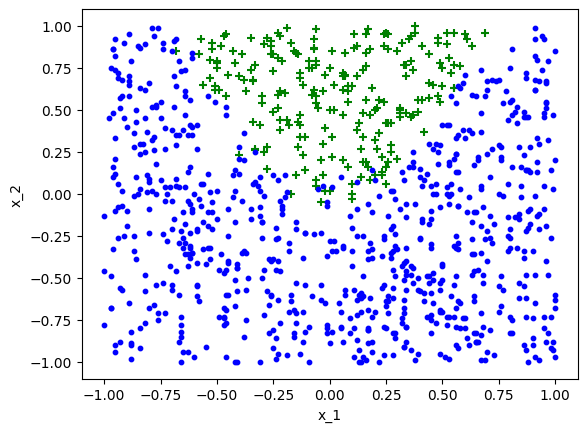

In [41]:
plt.scatter(X1[y == 1], X2[y == 1], c='g', marker = '+', label='1')                 #c defines color; marker defines the symbol
plt.scatter(X1[y == -1], X2[y == -1], c='b', marker = 'o', label='-1', s = 10)        #lable specifies the lable for data points; s means sizes
plt.xlabel('x_1')               #name the x lable
plt.ylabel('x_2')               #name the y lable
plt.show()

Question a(ii)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) 
# prepare the logistic regression model for predictions
# y stands for target variable
# 0.2 means 20 percent for test and 80 percent for train
# random seed 4
print('80% Train ', x_train.shape, y_train.shape)
print('20% Test ', x_test.shape, y_test.shape)      #output results

80% Train  (799, 2) (799,)
20% Test  (200, 2) (200,)


In [43]:
fitting = LogisticRegression()
fitting.fit(x_train, y_train)
slope = fitting.coef_[0]                       #get the slope
intercept = fitting.intercept_                 #get the intercept of the fitting line
print('The slopes are: ', slope)          
print('The intercept is: ', intercept)     
predicting = fitting.predict(x_train)
accuracy = fitting.score(x_train, y_train)
print('The approximation/accuracy is: [', accuracy, "]")
#linear model y = theta0 + theta1 * X1 + theta2 * X2

The slopes are:  [0.15540566 3.54156572]
The intercept is:  [-2.1506819]
The approximation/accuracy is: [ 0.8235294117647058 ]


Feature: 0, Score: 0.15541
Feature: 1, Score: 3.54157


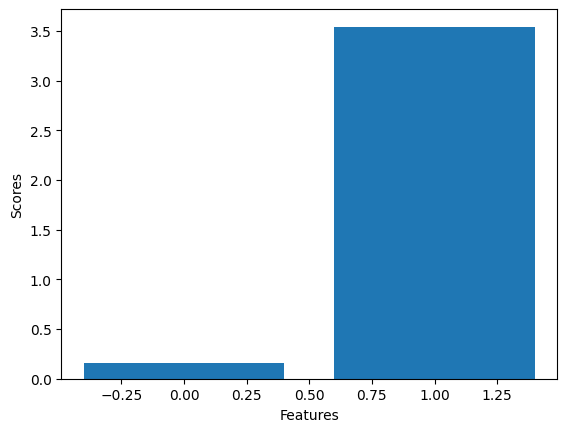

In [44]:
feature = fitting.coef_[0]
for i, j in enumerate(feature):							#iterate over the element of the feature array
	print('Feature: %0d, Score: %.5f' % (i, j))			#enumerate() loop through feature while keep track of the index i and value j
plt.bar([x for x in range(len(feature))], feature)		#show all the features
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()
#hence we know the feature1 has most influence and may cause the score increase due to the high score it got
#feature 0 have a relatively small score which indicates that it has a lower influence and may cause the score decrease

In [45]:
cla = metrics.classification_report(y_train, predicting)
print(cla)

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       622
           1       0.62      0.54      0.57       177

    accuracy                           0.82       799
   macro avg       0.74      0.72      0.73       799
weighted avg       0.82      0.82      0.82       799



Question a(iii)

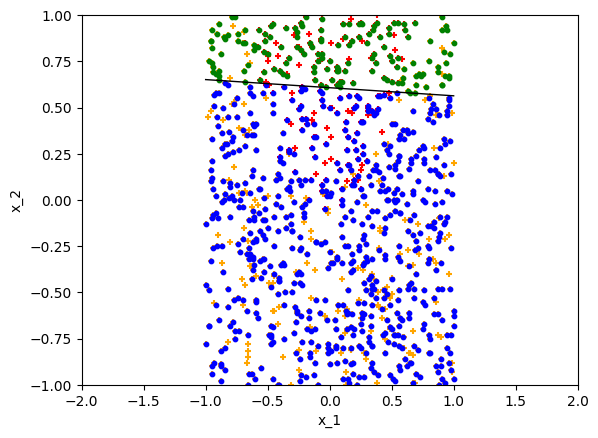

In [66]:
interception = fitting.intercept_[0]                                      #extract the intercept
feature0, feature1 = fitting.coef_.T                                   #extracts the coefficients of the linear regression model for two features

intercept_d = -interception / feature1                                     #calculate the slope slope_d and intercept intercept_d of the decision boundary line                                                                         
slope_d = -feature0 / feature1                                          #using the extracted coefficients and intercept.

x_d = np.array([-1, +1])                                                #These lines calculate the coordinates for the decision boundary line 
y_d = slope_d*x_d + intercept_d                                         #using the calculated slope slope_d, intercept intercept_d, and the specified x-axis limits. 

plt.plot(x_d, y_d, 'k', lw = 1, ls = '-')                               #plot the boundary line

plt.scatter(*X[y == -1].T, s = 15, c = 'orange', marker = '+')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+')                     #plot the original data
plt.scatter(*x_train[predicting == -1].T, s = 10, c = 'blue', marker = 'o')
plt.scatter(*x_train[predicting == +1].T, s = 10, c = 'green', marker = 'o')    #plot the training data point
plt.xlim(-2, +2)
plt.ylim(-1, +1)                                                        #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Question a(iv)

In [47]:
#The number of dots for trained data and the original data remain a similar percentage below and above the boundary line,
#which indicates the high score and high accuracy for the prediction

Question b(i)

In [48]:
linearSVC1 = LinearSVC(C=0.001)                          #dual=True is typically more suitable 
print(linearSVC1)                                                   #when the number of features (columns) in your dataset 
linearSVC1.fit(x_train, y_train)                                    #is greater than the number of samples (rows).
score = linearSVC1.score(x_train, y_train)
print("Score: ", score)
print('The coefficients are: ',linearSVC1.coef_[0])
print('The intercept is: ',linearSVC1.intercept_)                   #dual formulation

LinearSVC(C=0.001)
Score:  0.7784730913642053
The coefficients are:  [-0.00574136  0.28355148]
The intercept is:  [-0.34063051]


In [49]:
linearSVC2 = LinearSVC(C=1)                              #dual=True is typically more suitable 
print(linearSVC2)                                                   #when the number of features (columns) in your dataset 
linearSVC2.fit(x_train, y_train)                                    #is greater than the number of samples (rows).
score = linearSVC2.score(x_train, y_train)
print("Score: ", score)
print('The coefficients are: ',linearSVC2.coef_[0])
print('The intercept is: ',linearSVC2.intercept_)                   #dual formulation

LinearSVC(C=1)
Score:  0.8272841051314143
The coefficients are:  [0.05319929 1.29954342]
The intercept is:  [-0.76234479]


In [50]:
linearSVC3 = LinearSVC(C=100, dual=False)                           #This formulation is generally more efficient and recommended 
print(linearSVC3)                                                   #when you have a "tall" dataset, meaning you have more samples than features.
linearSVC3.fit(x_train, y_train)                                    #reduce memory usage and improve training speed
score = linearSVC3.score(x_train, y_train)                          
print("Score: ", score)
print('The coefficients are: ',linearSVC3.coef_[0])
print('The intercept is: ',linearSVC3.intercept_)                   #primal formulation

LinearSVC(C=100, dual=False)
Score:  0.8260325406758448
The coefficients are:  [0.05388291 1.31397025]
The intercept is:  [-0.76881162]


Question b(ii)

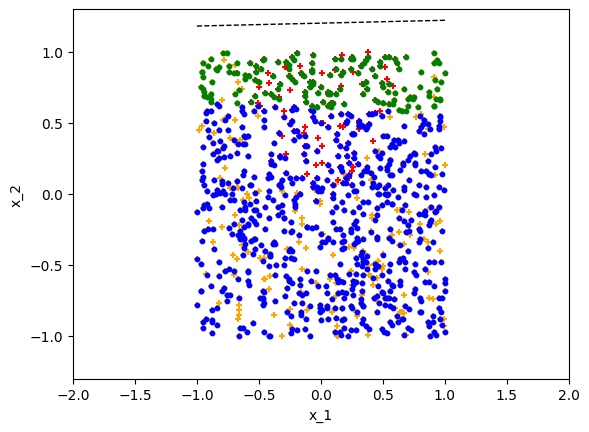

In [65]:
intercept_SVC1 = linearSVC1.intercept_[0]                                                    #Use C=0.001 classifiers to 
feature0_SVC1, feature1_SVC1 = linearSVC1.coef_.T                                            #predict the target values in the training data   
intercept_d_SVC1 = -intercept_SVC1 / feature1_SVC1
slope_d_SVC1 = -feature0_SVC1 / feature1_SVC1
x_d_SVC1 = np.array([-1, +1])
y_d_SVC1 = slope_d_SVC1 * x_d_SVC1 + intercept_d_SVC1

plt.plot(x_d_SVC1, y_d_SVC1, 'k', lw = 1, ls = '--')   
plt.scatter(*X[y == -1].T, s = 15, c = 'orange', marker = '+')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+')                     #plot the original data
plt.scatter(*x_train[predicting == -1].T, s = 10, c = 'blue', marker = 'o')
plt.scatter(*x_train[predicting == +1].T, s = 10, c = 'green', marker = 'o')    #plot the training data point
plt.xlim(-2, +2)
plt.ylim(-1.3, +1.3)                                                                             #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()                        

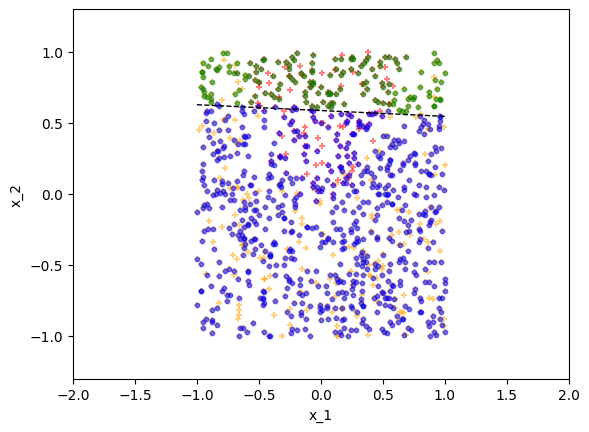

In [52]:
intercept_SVC2 = linearSVC2.intercept_[0]                                                    #Use C=1 classifiers to 
feature0_SVC2, feature1_SVC2 = linearSVC2.coef_.T                                            #predict the target values in the training data 
intercept_d_SVC2 = -intercept_SVC2 / feature1_SVC2
slope_d_SVC2 = -feature0_SVC2 / feature1_SVC2
x_d_SVC2 = np.array([-1, +1])
y_d_SVC2 = slope_d_SVC2 * x_d_SVC2 + intercept_d_SVC2

plt.plot(x_d_SVC2, y_d_SVC2, 'k', lw = 1, ls = '--')
plt.scatter(*X[y == -1].T, s = 15, c = 'orange', marker = '+')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+')                     #plot the original data
plt.scatter(*x_train[predicting == -1].T, s = 10, c = 'blue', marker = 'o')
plt.scatter(*x_train[predicting == +1].T, s = 10, c = 'green', marker = 'o')    #plot the training data point
plt.xlim(-2, +2)
plt.ylim(-1.3, +1.3)                                                                             #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

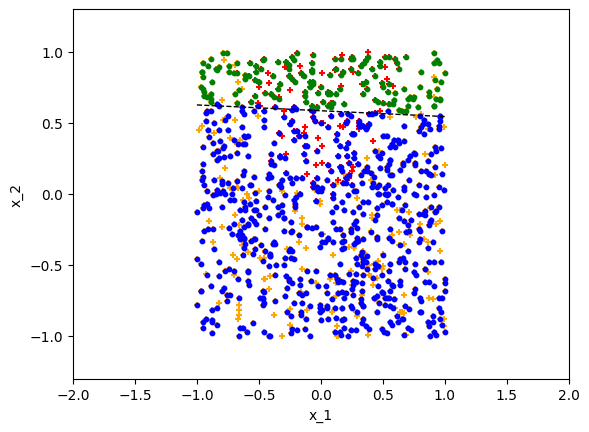

In [64]:
intercept_SVC3 = linearSVC3.intercept_[0]                                                       #Use C=100 classifiers to 
feature0_SVC3, feature1_SVC3 = linearSVC3.coef_.T                                               #predict the target values in the training data 
intercept_d_SVC3 = -intercept_SVC3 / feature1_SVC3
slope_d_SVC3 = -feature0_SVC3 / feature1_SVC3
x_d_SVC3 = np.array([-1, +1])
y_d_SVC3 = slope_d_SVC3 * x_d_SVC3 + intercept_d_SVC3

plt.plot(x_d_SVC3, y_d_SVC3, 'k', lw = 1, ls = '--')
plt.scatter(*X[y == -1].T, s = 15, c = 'orange', marker = '+')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+')                        #plot the original data
plt.scatter(*x_train[predicting == -1].T, s = 10, c = 'blue', marker = 'o')
plt.scatter(*x_train[predicting == +1].T, s = 10, c = 'green', marker = 'o')       #plot the training data point
plt.xlim(-2, +2)
plt.ylim(-1.3, +1.3)                                                                                #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Question b(iii)

In [54]:
#C controls the trade-off between maximizing the margin and minimizing the classification error

#When C is small (e.g., C = 0.001), the model will prioritize maximizing the margin even if some training examples are misclassified. 
#This leads to a wider margin but may result in misclassification of some data points.

#When C is large (e.g., C = 100), the model will prioritize correctly classifying as many training examples as possible. 
#This leads to a narrower margin but fewer misclassifications.


#When C is small, the SVM model is more likely to tolerate training errors, 
#so it might generalize better to unseen data, especially when the training data contains noise or outliers.

#When C is large, the SVM model is more sensitive to individual data points and may overfit the training data, 
#resulting in poor generalization.


#In summary, 'C,' as a penalty parameter, plays a pivotal role in regulating the influence of noise on the model. 
#Setting 'C' too high reduces tolerance for noise, causing the model to overfit by attempting to fit every data point meticulously. 
#Conversely, setting 'C' too low results in a high tolerance for noise, potentially causing essential data points to be overlooked, 
#leading to underfitting of the model.


Question b(iv)

In [55]:
#Logistic Regression optimizes a logistic loss function, 
#and its output can be interpreted as class probabilities. 

#Linear SVM aims to find a hyperplane that maximizes the margin between classes 
#and does not directly provide class probabilities.

#Logistic Regression is more sensitive to outliers than Linear SVM 
#because it aims to minimize the logistic loss

#In terms of predictions, Logistic Regression provides class probabilities
#SVM provides hard binary predictions.

#The choice between SVM and Logistic Regression depends on 
#the nature of the problem, the need for probability estimates, and the presence of outliers or noisy data.

Question c(i)

In [56]:
# create two more features starting from copying a new dataframe
df1 = data.copy()
df1['X1^2'] = df1['X1']**2
df1['X2^2'] = df1['X2']**2           #adding the square of the each feature to create two new additional feature
df1.head()

,X1,X2,y,X1^2,X2^2
0,0.53,-0.01,-1,0.2809,0.0001
1,-0.61,0.81,-1,0.3721,0.6561
2,-0.51,0.62,1,0.2601,0.3844
3,-0.14,0.28,1,0.0196,0.0784
4,-0.52,-0.21,-1,0.2704,0.0441


In [57]:
X_1=np.column_stack((X1,X2,X1**2,X2**2))
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_1,y, test_size=0.2,random_state=4)
# prepare the logistic regression model for predictions
# y stands for target variable
# 0.2 means 20 percent for test and 80 percent for train
# random seed 4
print('80% Train ', x_train1.shape, y_train1.shape)
print('20% Test ', x_test1.shape, y_test1.shape)      #output results
#Extract x1 and x2 through numpy , and then use the insert function
#to add new features, and the values of the new features are x1^2 and x2^2 respectively

80% Train  (799, 4) (799,)
20% Test  (200, 4) (200,)


In [58]:
fitting1 = LogisticRegression()
fitting1.fit(x_train1, y_train1)
slope = fitting1.coef_[0]                       #get the slope
intercept = fitting1.intercept_                 #get the intercept of the fitting1 line
print('The slopes are: ', slope)          
print('The intercept is: ', intercept)     
predicting1 = fitting1.predict(x_train1)
accuracy1 = fitting1.score(x_train1, y_train1)
print('The approximation/accuracy is: [', accuracy, "]")

The slopes are:  [ 0.24208967  4.91781255 -7.46164457  0.06631466]
The intercept is:  [-0.68104458]
The approximation/accuracy is: [ 0.8235294117647058 ]


In [59]:
clac = metrics.classification_report(y_train1, predicting)
print(clac)

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       622
           1       0.62      0.54      0.57       177

    accuracy                           0.82       799
   macro avg       0.74      0.72      0.73       799
weighted avg       0.82      0.82      0.82       799



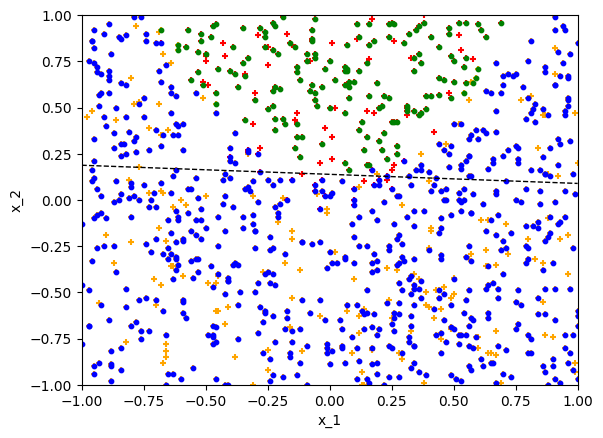

In [63]:
XX=np.column_stack((X1**2,X2**2))
interception1 = fitting1.intercept_[0]
features=features1, features2, features3, features4 = fitting1.coef_.T
intercept_d1 = -interception1/features2
slope_d1 = -features1/features2
x_d1 = np.array([-1, +1])
y_d1 = slope_d1 * x_d1 + intercept_d1
plt.plot(x_d1, y_d1, 'k', lw=1, ls='--')

plt.scatter(*X[y == -1].T, s = 15, c = 'orange', marker = '+')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+')                        #plot the original data
plt.scatter(*x_train[predicting1 == -1].T, s = 10, c = 'blue', marker = 'o')
plt.scatter(*x_train[predicting1 == +1].T, s = 10, c = 'green', marker = 'o')       #plot the training data point
plt.xlim(-1, +1)
plt.ylim(-1, +1)                                                                                #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()
#From the figure, we can see that in the prediction results, all the orange
#pluses are coincident with the blue dots, 
#and all the green dots are coincident with the red pluses, 
#which indicates that the data are consistent with the actual results.

Question c(iii)

baseline model accuracy:  0.7787787787787788
trained model accuracy:  0.9612015018773467


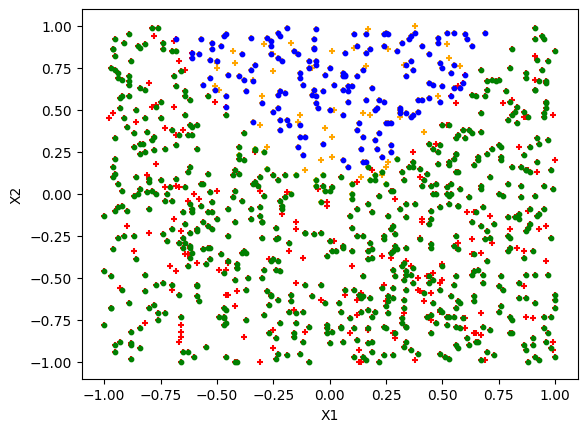

In [70]:
baseline_predictor = np.sign(statistics.mean(y))
ypred_baseline = np.full((len(y), 1), baseline_predictor)
fitting_accuracy = metrics.accuracy_score(y_train1, predicting1)
baseline_accuracy = metrics.accuracy_score(y, ypred_baseline)
print("baseline model accuracy: ", baseline_accuracy)
print("trained model accuracy: ", fitting_accuracy)
plt.scatter(X1[y == 1], X2[y == 1],color='orange', marker="+", s = 15)
plt.scatter(X1[y == -1], X2[y == -1],color='red', marker="+", s = 15)
plt.scatter(*x_train[predicting1 == 1].T,color='blue', marker="o", s = 10)
plt.scatter(*x_train[predicting1 == -1].T,color='green', marker="o", s = 10)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
#To create a baseline predictor, set the predictions all to constant 1 and compare the accuracy. 
#It can be found that the accuracy of the baseline model is lower than that of the model with added polynomials, 
# so the model with added polynomials performs the baseline model.